# ADR of ROMY Array - Data Quality

### Imports

In [1]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

from andbro__querrySeismoData import __querrySeismoData
from andbro__get_timeaxis import __get_timeaxis
from andbro__get_stream import __getStream

In [2]:
# def __get_stream(config):
    
#     from andbro__empty_trace import __empty_trace
    
#     st = obs.Stream()

#     for cha in config['cha']:

#         for i in range(len(config.get("sta"))):

#             seed = f'{config.get("net")[i]}.{config.get("sta")[i]}.{config.get("loc")}.{cha}'

#             print(f"loading {seed}...")
#             try:
#                 st0, inv = __querrySeismoData(  
#                                             seed_id=seed,
#                                             starttime=config.get("tbeg"),
#                                             endtime=config.get("tend"),
#                                             repository=config.get("repository"),
#                                             path=None,
#                                             restitute=True,
#                                             detail=None,
#                                             fill_value=None,
#                                             )
#                 if len(st0) == 1:
#                     st += st0
#                 elif len(st0) > 1:
#                     st += st0.merge()

#             except:
#                 print(f" -> failed to load {seed}!")
#                 print(f" -> substituted {seed} with NaN values! ")
#                 st_empty = obs.Stream()
#                 st_empty.append(__empty_trace(config, seed))
#                 st += st_empty

#     st.trim(config['tbeg'], config['tend'])
            
#     return st

### Configurations

In [3]:
config = {}

config['tbeg'] = obs.UTCDateTime("2022-04-08 00:00")
config['tend'] = obs.UTCDateTime("2022-04-09 00:00")

# config['sta'] = ['GELB','GRMB','BIB','TON', 'ALFT', 'FFB1', 'FFB2', 'FFB3', 'FUR']
# config['net'] = ['BW','BW','BW','BW','BW','BW','BW','BW','GR']
# config['loc'] = ''
# config['cha'] = ['BHZ', 'BHN', 'BHE']

config['seeds'] = [
                    'GR.FUR..BHZ', 'GR.FUR..BHN', 'GR.FUR..BHE',
                    'BW.GELB..BHZ', 'BW.GELB..BHN', 'BW.GELB..BHE',
                    'BW.TON..BHZ', 'BW.TON..BHN', 'BW.TON..BHE',
                    'BW.GRMB..BHZ', 'BW.GRMB..BHN', 'BW.GRMB..BHE',
                    'BW.ALFT..BHZ', 'BW.ALFT..BHN', 'BW.ALFT..BHE',
                    'BW.BIB..BHZ', 'BW.BIB..BHN', 'BW.BIB..BHE',
                    'BW.FFB1..BHZ', 'BW.FFB1..BH1', 'BW.FFB1..BH2',
                    'BW.FFB2..BHZ', 'BW.FFB2..BH1', 'BW.FFB2..BH2',
                    'BW.FFB3..BHZ', 'BW.FFB3..BH1', 'BW.FFB3..BH2',
]

config['repository'] = "jane"


config['channels'] = np.unique(np.array([i.split(".")[3] for i in config['seeds']]))
config['stations'] = np.unique(np.array([i.split(".")[1] for i in config['seeds']]))


import seaborn as sns
colors = list(sns.color_palette("husl", 10))
config['colors'] = dict(zip(config['stations'], colors))

In [4]:
# st = __get_stream(config)
st = __getStream(config)

st.resample(20)

loading GR.FUR..BHZ...
 -> removing response...
loading GR.FUR..BHN...
 -> removing response...
loading GR.FUR..BHE...
 -> removing response...
loading BW.GELB..BHZ...
 -> removing response...
loading BW.GELB..BHN...
 -> removing response...
loading BW.GELB..BHE...
 -> removing response...
loading BW.TON..BHZ...
 -> removing response...
loading BW.TON..BHN...
 -> removing response...
loading BW.TON..BHE...
 -> removing response...
loading BW.GRMB..BHZ...
 -> removing response...
loading BW.GRMB..BHN...
 -> removing response...
loading BW.GRMB..BHE...
 -> removing response...
loading BW.ALFT..BHZ...
 -> removing response...
loading BW.ALFT..BHN...
 -> removing response...
loading BW.ALFT..BHE...
 -> removing response...
loading BW.BIB..BHZ...
 -> removing response...
loading BW.BIB..BHN...
 -> removing response...
loading BW.BIB..BHE...
 -> removing response...
loading BW.FFB1..BHZ...
 -> removing response...
loading BW.FFB1..BH1...
 -> removing response...
loading BW.FFB1..BH2...
 -> r

27 Trace(s) in Stream:

GR.FUR..BHZ | 2022-04-07T23:59:59.989999Z - 2022-04-08T23:59:59.989999Z | 20.0 Hz, 1728001 samples
...
(25 other traces)
...
BW.FFB3..BH2 | 2022-04-08T00:00:00.000000Z - 2022-04-08T23:59:59.950000Z | 20.0 Hz, 1728000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [5]:
# st.plot(equal_scale=False);

In [6]:
print(st.__str__(extended=True))

27 Trace(s) in Stream:
GR.FUR..BHZ  | 2022-04-07T23:59:59.989999Z - 2022-04-08T23:59:59.989999Z | 20.0 Hz, 1728001 samples
GR.FUR..BHN  | 2022-04-07T23:59:59.990000Z - 2022-04-08T23:59:59.990000Z | 20.0 Hz, 1728001 samples
GR.FUR..BHE  | 2022-04-07T23:59:59.990000Z - 2022-04-08T23:59:59.990000Z | 20.0 Hz, 1728001 samples
BW.GELB..BHZ | 2022-04-08T00:00:00.017500Z - 2022-04-08T23:59:59.967500Z | 20.0 Hz, 1728000 samples
BW.GELB..BHN | 2022-04-08T00:00:00.017500Z - 2022-04-08T23:59:59.967500Z | 20.0 Hz, 1728000 samples
BW.GELB..BHE | 2022-04-08T00:00:00.017500Z - 2022-04-08T23:59:59.967500Z | 20.0 Hz, 1728000 samples
BW.TON..BHZ  | 2022-04-08T00:00:00.012500Z - 2022-04-09T00:00:00.012500Z | 20.0 Hz, 1728001 samples
BW.TON..BHN  | 2022-04-08T00:00:00.012500Z - 2022-04-09T00:00:00.012500Z | 20.0 Hz, 1728001 samples
BW.TON..BHE  | 2022-04-08T00:00:00.012500Z - 2022-04-09T00:00:00.012500Z | 20.0 Hz, 1728001 samples
BW.GRMB..BHZ | 2022-04-08T00:00:00.012500Z - 2022-04-09T00:00:00.012500Z | 20

### Plotting

/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


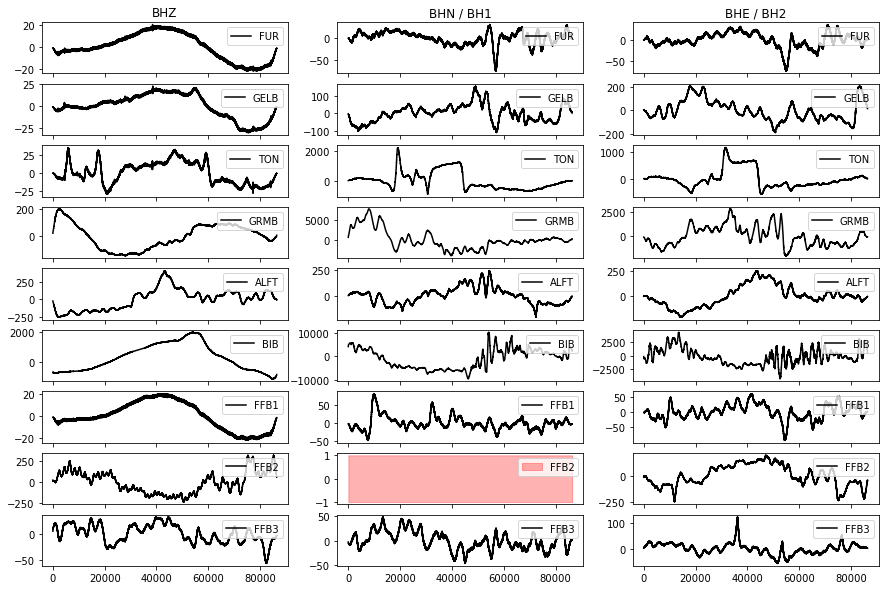

In [7]:
fig, ax = plt.subplots(len(set(config['stations'])),3, figsize=(15,10), sharex=True)

for k, component in enumerate(['Z','N','E']):
    
    select = st.select(channel=f"*{component}")
    
    ## add FFB BH1 and BH2 instead of BHN and BHE
    if component == "N":
        select += st.select(channel="*1")
    elif component == "E":
        select += st.select(channel="*2")
    
    for i, tr in enumerate(select):
        if np.isnan(tr.data).all():
            ax[i,k].fill_between(tr.times(), -1, 1, color='red', alpha=0.3, label=f'{tr.stats.station}')
        else:
            ax[i,k].plot(tr.times(),tr.data*1e6, color='k', label=f'{tr.stats.station}');
        ax[i,k].legend(loc="upper right")
        
    ax[0,0].set_title("BHZ")
    ax[0,1].set_title("BHN / BH1")
    ax[0,2].set_title("BHE / BH2")

    
fig.show();

In [8]:
def __calculate_spectra(st, config, mode='dB'):

    from datetime import datetime
    from pandas import date_range
    from obspy import UTCDateTime
    from scipy.signal import welch
    from numpy import where, array, zeros, log10

    def __check_stream(st):
        t1 = str(st[0].stats.starttime)
        t2 = str(st[0].stats.endtime)
        for tr in st:
            if str(tr.stats.starttime) != t1 or str(tr.stats.endtime) != t2:
                print(f"ERROR: mismatch in start or endtime of trace: {tr.stats.id}")
                return

    def __make_decibel(array, relative_value):
        return 10*log10(array/relative_value)

    ## check time consistency for all traces
#     __check_stream(st)

    ## check how many intervals are possible
    if config['interval_overlap'] is None:
        intervals = int((st[0].stats.endtime - st[0].stats.starttime)/config.get('interval'))
        shift = config['interval']
    else:
        shift = int(config.get('interval')*config['interval_overlap']/100)
        intervals = int((st[0].stats.endtime - st[0].stats.starttime)/shift)



    ## pre-define psd array
    size_psd = int(config.get('nperseg')/2)+1
    psd = zeros([intervals, size_psd])

    if size_psd >= len(st[0].data):
        print(f"ERROR: reduce nperseg or noverlap or segments! {size_psd} > {len(st[0].data)}")
        return

    for i, tr in enumerate(st):

        # initite variables for while loop
        dt1 = st[0].stats.starttime
        dt2 = st[0].stats.starttime + config['interval']
        n = 0

        while dt2 <= st[0].stats.endtime:

            tr_tmp = tr.copy()
            tr_tmp.trim(starttime = UTCDateTime(dt1), endtime=UTCDateTime(dt2))

#             print(n, dt1, dt2, "\n")

#             print(config.get('nperseg'), config.get('noverlap'), len(tr_tmp.data))
            try:
                f, psd0 = welch(
                            tr_tmp.data,
                            fs=tr_tmp.stats.sampling_rate,
                            window=config.get('taper'),
                            nperseg=config.get('nperseg'),
                            noverlap=config.get('noverlap'),
                            nfft=config.get('nfft'),
                            detrend=config.get('detrend'),
                            return_onesided=config.get('onesided'),
                            scaling=config.get('scaling'),
                           )
                psd[n] = psd0
            except:
                print("failed")
                break
            
            ## adjust variables
            dt1 += shift
            dt2 += shift
            n += 1


        if config.get('frequency_limits') is not None:
            f1, f2 = config.get('frequency_limits')[0], config.get('frequency_limits')[1]
            idx1, idx2 = int(where(f <= f1)[0][0]), int(where(f >= f2)[0][0])
            ff = f[idx1:idx2]
            tmp = zeros([intervals, len(ff)])
            for j in range(intervals):
                tmp[j] = psd[j,idx1:idx2]
            psd = tmp
        else:
            ff = f


    return ff, psd

In [9]:
def __get_median_psd(psds):

    from numpy import median, zeros, isnan

    med_psd = zeros(psds.shape[1])

    for f in range(psds.shape[1]):
        a = psds[:,f]
        med_psd[f] = median(a[~isnan(a)])

    return med_psd

In [10]:
def __get_psds(st, config):

    config['interval'] = 3600
    config['interval_overlap'] = 50 # in percent
    config['taper'] = 'hanning'
    config['segments'] = 1e2
    config['nperseg'] = 256*config.get('segments')
    config['noverlap'] = 64*config.get('segments')
    config['nfft'] = None
    config['detrend'] = 'constant'
    config['scaling'] = 'density'
    config['onesided'] = True
    config['frequency_limits'] = (0, 10) # in Hz

    
    psds, frequencies, station_names = [], [], []
    
    for cha in config['channels']:
        for sta in config['stations']:

            station_select = st.select(id=f"*.{sta}.*.{cha}")

            if len(station_select) == 1:
    #             print(f"*.{sta}.*.{cha}")
                station_names.append(f"{sta}.{cha}")
                ff, psd = __calculate_spectra(station_select, config, mode=None)
                psd_median = __get_median_psd(psd)

                psds.append(psd_median)
                frequencies.append(ff)  

    config['station_names'] = station_names
    return psds, frequencies, config

In [11]:
config['interval'] = 3600
config['interval_overlap'] = 50 # in percent
config['taper'] = 'hanning'
config['segments'] = 1e2
config['nperseg'] = 256*config.get('segments')
config['noverlap'] = 64*config.get('segments')
config['nfft'] = None
config['detrend'] = 'constant'
config['scaling'] = 'density'
config['onesided'] = True
config['frequency_limits'] = (0, 10) # in Hz


psds, frequencies, config = __get_psds(st, config):

# for cha in config['channels']:
#     for sta in config['stations']:
        
#         station_select = st.select(id=f"*.{sta}.*.{cha}")
            
#         if len(station_select) == 1:
# #             print(f"*.{sta}.*.{cha}")
#             station_names.append(f"{sta}.{cha}")
#             ff, psd = __calculate_spectra(station_select, config, mode=None)
#             psd_median = __get_median_psd(psd)
        
#             psds.append(psd_median)
#             frequencies.append(ff)        

SyntaxError: invalid syntax (<ipython-input-11-7b18f4196bb8>, line 14)

In [ ]:
def __makeplot_PSD_components(psds, frequencies, config):

    tmp = np.load(f"/import/kilauea-data/LNM/data/MODELS/"+"noise_models.npz")
    nm_periods, nlnm, nhnm = tmp['model_periods'], tmp['low_noise'], tmp['high_noise']; del tmp

    nlnm_psd = 10**(nlnm/10)
    nhnm_psd = 10**(nhnm/10)

    fig, ax = plt.subplots(3,1,figsize=(15,15), sharex=True)

    for psd, ff, station_name in zip(psds, frequencies, config['station_names']):
        
        pp = np.zeros(len(ff))
        pp[:-1] = 1/ff[1:]        
        
        if np.nonzero(psd)[0].size == 0:
            continue

        if station_name[-1] == "Z":
            ax[0].loglog(pp, psd, label=station_name, color=config['colors'][station_name.split('.')[0]])
        elif station_name[-1] in ["N","1"]:
            ax[1].loglog(pp, psd, label=station_name, color=config['colors'][station_name.split('.')[0]])
        elif station_name[-1] in ["E","2"]:
            ax[2].loglog(pp, psd, label=station_name, color=config['colors'][station_name.split('.')[0]])

    for jj in range(3):
        ax[jj].loglog(nm_periods, nlnm_psd, ls="--", color="black")
        ax[jj].loglog(nm_periods, nhnm_psd, ls="--", color="black")

        ax[jj].legend(loc="upper right")

        ax[jj].set_ylabel(r"PSD ($m^2 / s^4 / Hz$)", fontsize=14)

        ax[jj].grid(True, which="both", ls="-", alpha=0.5)

        
        ax[jj].set_xlim(0.2,200)
        ax[jj].set_ylim(1e-19, 1e-9)

    ax[jj].set_xlabel("Period (s)", fontsize=14)
    plt.show();
    return fig

In [ ]:
fig = __makeplot_PSD_components(psds, frequencies, config)

## Get ADR ROMY array

In [ ]:
config_adr  = config.copy()

config_adr['repository'] = "archive"

config_adr['seeds'] = [
                    'BW.ROMY.20.BJZ', 'BW.ROMY.20.BJN', 'BW.ROMY.20.BJE',

]

config_adr['channels'] = np.unique(np.array([i.split(".")[3] for i in config_adr['seeds']]))
config_adr['stations'] = np.unique(np.array([i.split(".")[1] for i in config_adr['seeds']]))

In [ ]:
st_adr = __getStream(config_adr, restitute=False)

In [ ]:
st_adr.plot(equal_scale=False);

In [ ]:
psds_adr, frequencies_adr, config_adr = __get_psds(st_adr, config_adr)

In [ ]:
fig = __makeplot_PSD_components(psds_adr, frequencies_adr, config_adr)

### Processing

In [ ]:
st2 = st.copy();

st2.detrend('simple');

# for tr in st:
#     if tr.stats.sampling_rate > 20:
#         tr.resample(20);

st2.taper(0.1)

config['filter'] = {'type':'bandpass', 
                    'fmin':0.01, 
                    'fmax':1}

if config['filter']:
    st2.filter(config['filter']['type'], 
              freqmin=config['filter']['fmin'],
              freqmax=config['filter']['fmax'], 
              corners=4, 
              zerophase=True);
print(st2);

In [ ]:
fig, ax = plt.subplots(len(config['stations']),3, figsize=(15,10), sharex=True)

for k, component in enumerate(['Z','N','E']):
    for i, tr in enumerate(st2.select(channel=f"*{component}")):
        
        if np.isnan(tr.data).all():
            ax[i,k].fill_between(tr.times(), -1, 1, color='red', alpha=0.3, label=f'{tr.stats.station}')
        else:
            ax[i,k].plot(tr.times(),tr.data*1e6, color='k', label=f'{tr.stats.station}');
        ax[i,k].legend(loc="upper right")
        
    ax[0,k].set_title(tr.stats.channel)
    
    
fig.show();